# Analysis of GEOS-Chem Modelled PM2.5 Over UK 

In [236]:
# import packages 
import xarray as xr
import pandas
import os
import glob
import numpy as np
import geopandas as gpd
from shapely import geometry
from shapely.ops import unary_union
import cartopy.crs as ccrs

%matplotlib inline
import matplotlib.pyplot as plt
from gamap_colormap import WhGrYlRd
from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown

In [237]:
# read data from shapefile
UK_boundary = gpd.read_file('D:\Jupyter code\gadm40_GBR_shp\gadm40_GBR_1.shp')
UK_city = gpd.read_file('D:\Jupyter code\gadm36_GBR_shp\gadm36_GBR_2.shp') 

In [238]:
# parameters for concentration unit conversion 
STP_P = 101325 # standard P
STP_T = 293.    # standard T; 20 deg C
ppm_mgm3 = 1/ 22.4 * 273 / STP_T* STP_P/ 101325  # 1μmol/mol = 1ppm = 1000ppb      1mol/mol = 1*10e3 mmol/mol  1ppm=1.0e-6mol/mol
diag_MWs = [96.06, 62.01, 18.05, 12.01, 12.01, 12.01, 12.01, 31.4, 29.0, 29.0, 150.0]

In [239]:
# import UK_land_mask and select main areas
GC = xr.open_dataset("D:/Jupyter code/uk-land-mask-025x03125.nc")
pandas.set_option('display.max_rows', None) # show all lines in display
# display(GC)

# delete values of GC["uk-mask"]=0 to avoid errors(including sea areas) in calculating mean() value below
GC = GC.where(GC["uk-mask"].values != 0) 
# display(GC)

# select main areas' values
GC_land = GC.sel(lat=slice(49.25,59.5),lon=slice(-9.375,2.188))
GC_ire=GC.sel(lat=slice(54,55.3),lon=slice(-8.2,-5.4))
GC_n=GC.sel(lat=slice(54,56),lon=slice(-5.2,0))
GC_sw=GC.sel(lat=slice(49.9,54),lon=slice(-5.8,-1.9))
GC_se=GC.sel(lat=slice(49.9,54),lon=slice(-1.9,1.8))

In [240]:
# there are three scenarios that we need to analyze
scenarios=["baseline","cle","mtf"]

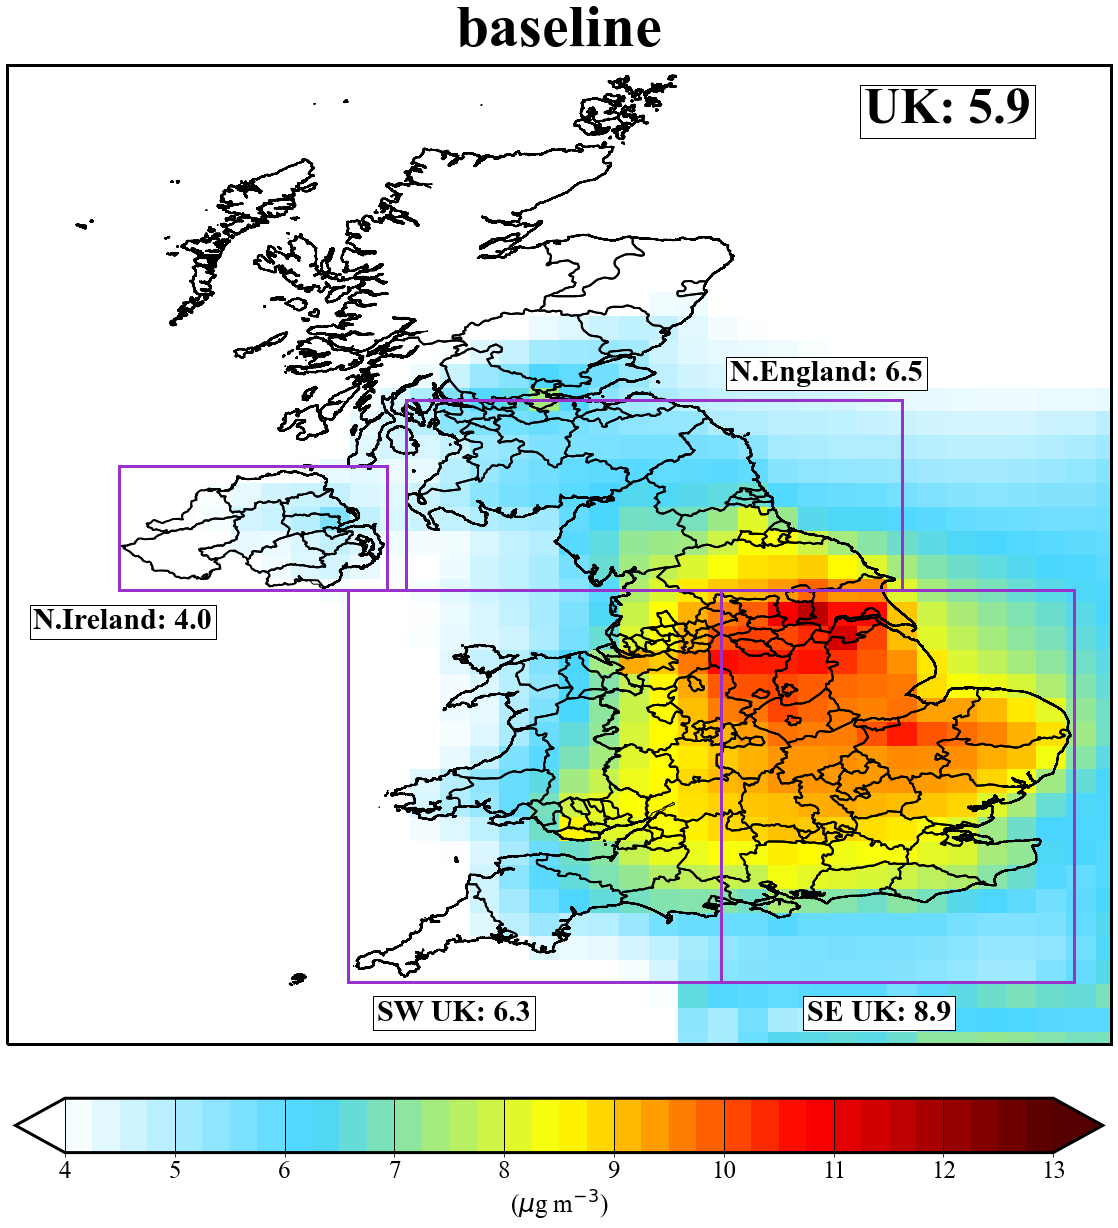

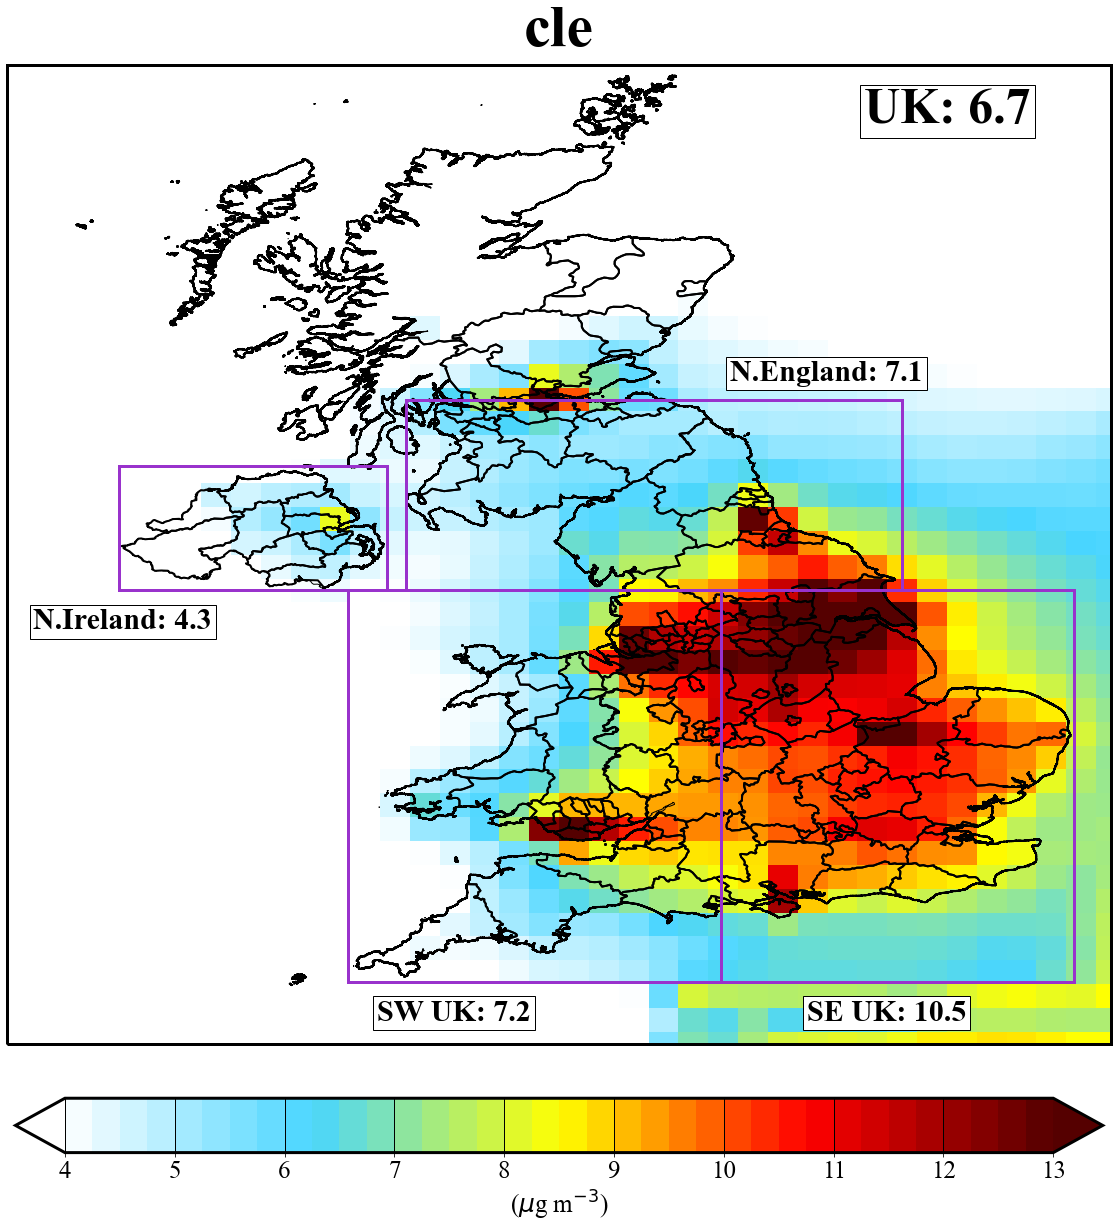

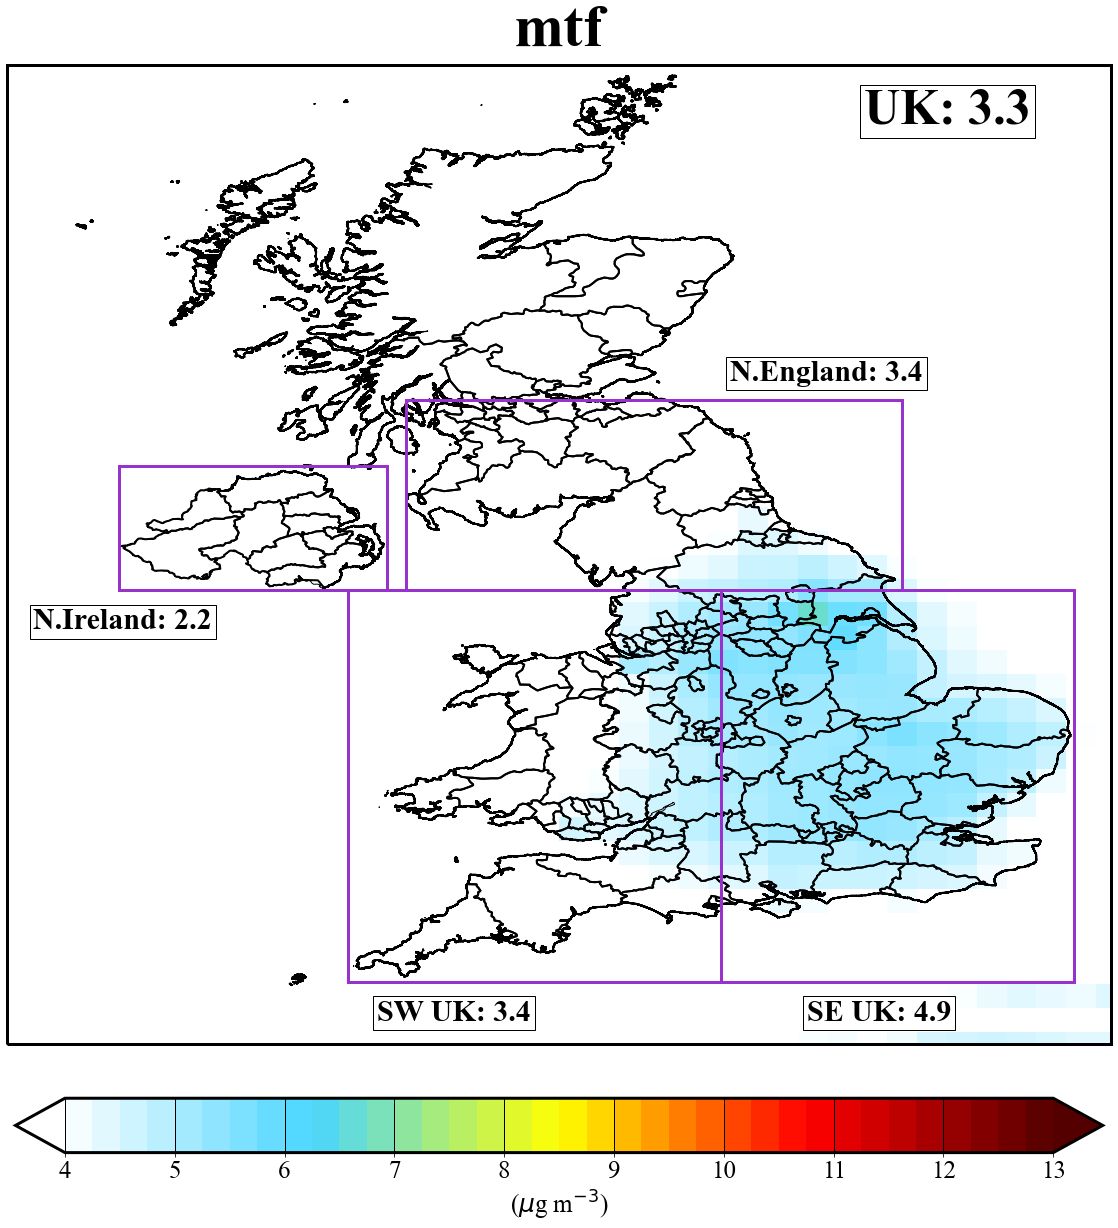

In [243]:
# plot the PM2.5 figure
for chosen_scenario in scenarios:
    path="D:/Jupyter code/GEOS-CHEM/" + chosen_scenario +  "_uk_nest/GEOSChem.SpeciesConc*.nc4"
    # calculate the average PM2.5 
    locals()[chosen_scenario]  = sorted(glob.glob(path))
    locals()[chosen_scenario + "_species"]  = [xr.open_dataset(file) for file in vars()[chosen_scenario]]
    locals()[chosen_scenario + "_SO4"] = [data['SpeciesConc_SO4'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_NIT"] = [data['SpeciesConc_NIT'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_NH4"] = [data['SpeciesConc_NH4'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_BCPO"] = [data['SpeciesConc_BCPO'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_BCPI"] = [data['SpeciesConc_BCPI'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_OCPO"] = [data['SpeciesConc_OCPO'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_OCPI"] = [data['SpeciesConc_OCPI'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_SALA"] = [data['SpeciesConc_SALA'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_DST1"] = [data['SpeciesConc_DST1'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_DST2"] = [data['SpeciesConc_DST2'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_SOAS"] = [data['SpeciesConc_SOAS'].isel(time=0,lev=0) for data in vars()[chosen_scenario + "_species"]]
    locals()[chosen_scenario + "_SO4"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_SO4"]]
    locals()[chosen_scenario + "_NIT"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_NIT"]]
    locals()[chosen_scenario + "_NH4"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_NH4"]]
    locals()[chosen_scenario + "_BCPO"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_BCPO"]]
    locals()[chosen_scenario + "_BCPI"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_BCPI"]]
    locals()[chosen_scenario + "_OCPO"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_OCPO"]]
    locals()[chosen_scenario + "_OCPI"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_OCPI"]]
    locals()[chosen_scenario + "_SALA"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_SALA"]]
    locals()[chosen_scenario + "_DST1"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_DST1"]]
    locals()[chosen_scenario + "_DST2"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_DST2"]]
    locals()[chosen_scenario + "_SOAS"] = [1 * 1.0e9 * var * 96.06 * ppm_mgm3 for var in vars()[chosen_scenario + "_SOAS"]]
    locals()[chosen_scenario + "_SO4_ave"] = sum(locals()[chosen_scenario + "_SO4"])/len(vars()[chosen_scenario + "_SO4"]) 
    locals()[chosen_scenario + "_NIT_ave"] = sum(locals()[chosen_scenario + "_NIT"])/len(vars()[chosen_scenario + "_NIT"]) 
    locals()[chosen_scenario + "_NH4_ave"] = sum(locals()[chosen_scenario + "_NH4"])/len(vars()[chosen_scenario + "_NH4"]) 
    locals()[chosen_scenario + "_BCPO_ave"] = sum(locals()[chosen_scenario + "_BCPO"])/len(vars()[chosen_scenario + "_BCPO"]) 
    locals()[chosen_scenario + "_BCPI_ave"] = sum(locals()[chosen_scenario + "_BCPI"])/len(vars()[chosen_scenario + "_BCPI"]) 
    locals()[chosen_scenario + "_OCPO_ave"] = sum(locals()[chosen_scenario + "_OCPO"])/len(vars()[chosen_scenario + "_OCPO"])
    locals()[chosen_scenario + "_OCPI_ave"] = sum(locals()[chosen_scenario + "_OCPI"])/len(vars()[chosen_scenario + "_OCPI"]) 
    locals()[chosen_scenario + "_SALA_ave"] = sum(locals()[chosen_scenario + "_SALA"])/len(vars()[chosen_scenario + "_SALA"]) 
    locals()[chosen_scenario + "_DST1_ave"] = sum(locals()[chosen_scenario + "_DST1"])/len(vars()[chosen_scenario + "_DST1"]) 
    locals()[chosen_scenario + "_DST2_ave"] = sum(locals()[chosen_scenario + "_DST2"])/len(vars()[chosen_scenario + "_DST2"]) 
    locals()[chosen_scenario + "_SOAS_ave"] = sum(locals()[chosen_scenario + "_SOAS"])/len(vars()[chosen_scenario + "_SOAS"])
    locals()[chosen_scenario + "_PM25"] = (vars()[chosen_scenario + "_NH4_ave"] + vars()[chosen_scenario + "_NIT_ave"] + vars()[chosen_scenario + "_SO4_ave"]) * 1.35
    + vars()[chosen_scenario + "_BCPI_ave"] + vars()[chosen_scenario + "_BCPO_ave"]  
    +(vars()[chosen_scenario + "_OCPO_ave"] + (vars()[chosen_scenario + "_OCPI_ave"] * 1.07 ) ) * 2.1  
    + vars()[chosen_scenario + "_DST1_ave"] + vars()[chosen_scenario + "_DST2_ave"] * 0.30  
    + vars()[chosen_scenario + "_SALA_ave"] * 1.86  + vars()[chosen_scenario + "_SOAS_ave"] * 1.07
    
    # visualize the average PM2.5  on UK map
    fig = plt.figure(figsize=[30,20])
    ax = plt.axes(projection=ccrs.Mercator())
    ax.add_geometries(UK_boundary.geometry, crs=ccrs.Mercator(),edgecolor='black',facecolor='none', zorder=1)
    ax.add_geometries(UK_city.geometry, crs=ccrs.Mercator(),edgecolor='black',facecolor='none',linewidth=2, zorder=1)
    locals()[chosen_scenario + "_PM25"].plot(ax=ax,cmap=WhGrYlRd,vmin=4,vmax=13,zorder=0) 
    ax.set(xlim=(-9.375,2.188),ylim=(49.25,59.5))
    ax.set_title(f"{chosen_scenario}",fontsize=60,weight='bold', pad=20)

    # set colorbar
    PCM=ax.get_children()[2]
    bounds = np.arange(4,13.25,0.25)
    colorbar = plt.colorbar(PCM,ax=ax,label='($\mu$g m$^{-3}$)',orientation='horizontal',fraction=0.05,shrink=1,pad=0.05,extend = 'both', boundaries=bounds)
    colorbar.set_ticks([4,5,6,7,8,9,10,11,12,13])
    colorbar.ax.tick_params(labelsize=25) 
    colorbar.ax.xaxis.label.set_size(25)

    for x in np.array([4,5,6,7,8,9,10,11,12,13,14]):
        colorbar.ax.axvline(x,ymin=0, ymax=1,linewidth=1, color='black')
    plt.rcParams['axes.linewidth'] =3

    # remove the unwanted colorbar that comes by default
    plt.delaxes(fig.axes[1])
    # turn on this to save out without the legend
#     plt.delaxes(fig.axes[-1])
    # turn on this to generate the legend only
    # plt.delaxes(fig.axes[0])

    # add area demarcation lines
    start_lon =1.8
    end_lon=1.8
    start_lat=49.9
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-8.2
    end_lon=1.8
    start_lat=54
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-5.8
    end_lon=1.8
    start_lat=49.9
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-5.8
    end_lon=-5.8
    start_lat=54
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-1.9
    end_lon=-1.9
    start_lat=54
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-8.2
    end_lon=-8.2
    start_lat=54
    end_lat=55.3
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-8.2
    end_lon=-5.4
    start_lat=55.3
    end_lat=55.3
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-5.4
    end_lon=-5.4
    start_lat=55.3
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =-5.2
    end_lon=-5.2
    start_lat=54
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =0
    end_lon=0
    start_lat=54
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)
    start_lon =0
    end_lon=-5.2
    start_lat=56
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-',linewidth=3)

    # calculate mean PM2.5 in each area
    locals()[chosen_scenario + "_PM25_land"] = locals()[chosen_scenario + "_PM25"]*GC_land["uk-mask"]
    locals()[chosen_scenario + "_PM25_ire"] = locals()[chosen_scenario + "_PM25"]*GC_ire["uk-mask"]
    locals()[chosen_scenario + "_PM25_n"] = locals()[chosen_scenario + "_PM25"]*GC_n["uk-mask"]
    locals()[chosen_scenario + "_PM25_sw"] = locals()[chosen_scenario + "_PM25"]*GC_sw["uk-mask"]
    locals()[chosen_scenario + "_PM25_se"] = locals()[chosen_scenario + "_PM25"]*GC_se["uk-mask"]
    locals()[chosen_scenario + "_PM25_land"] = locals()[chosen_scenario + "_PM25_land"].mean().values
    locals()[chosen_scenario + "_PM25_ire"] = locals()[chosen_scenario + "_PM25_ire"].mean().values
    locals()[chosen_scenario + "_PM25_n"] = locals()[chosen_scenario + "_PM25_n"].mean().values
    locals()[chosen_scenario + "_PM25_sw"] = locals()[chosen_scenario + "_PM25_sw"].mean().values
    locals()[chosen_scenario + "_PM25_se"] = locals()[chosen_scenario + "_PM25_se"].mean().values
    locals()[chosen_scenario + "_PM25_land"] = ('%.1f' %locals()[chosen_scenario + "_PM25_land"])
    locals()[chosen_scenario + "_PM25_ire"] = ('%.1f' %locals()[chosen_scenario + "_PM25_ire"])
    locals()[chosen_scenario + "_PM25_n"] = ('%.1f' %locals()[chosen_scenario + "_PM25_n"])
    locals()[chosen_scenario + "_PM25_sw"] = ('%.1f' %locals()[chosen_scenario + "_PM25_sw"])
    locals()[chosen_scenario + "_PM25_se"] = ('%.1f' %locals()[chosen_scenario + "_PM25_se"])
    ax.text(-0.4,58.9,f'UK: {locals()[chosen_scenario + "_PM25_land"]}',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-9.1,53.6,f'N.Ireland: {locals()[chosen_scenario + "_PM25_ire"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1.8,56.2,f'N.England: {locals()[chosen_scenario + "_PM25_n"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1,49.5,f'SE UK: {locals()[chosen_scenario + "_PM25_se"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-5.5,49.5,f'SW UK: {locals()[chosen_scenario + "_PM25_sw"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))

    # save the figure in png.
    fig.savefig(f'D:/Jupyter code/PM output/{chosen_scenario}_uk_nest.png', dpi=100, bbox_inches='tight')        

In [244]:
# calculate the elative change of PM2.5 every two of data scenarios
PM25_change_1 = (locals()["cle_PM25"] - locals()["baseline_PM25"]) / locals()["baseline_PM25"] * 100
PM25_change_2 = (locals()["mtf_PM25"] - locals()["cle_PM25"]) / locals()["cle_PM25"] * 100
PM25_change_3 = (locals()["mtf_PM25"] - locals()["baseline_PM25"]) / locals()["baseline_PM25"] * 100

In [245]:
# plot three kinds of relative change figures
situations=["PM25_change_1","PM25_change_2","PM25_change_3"]

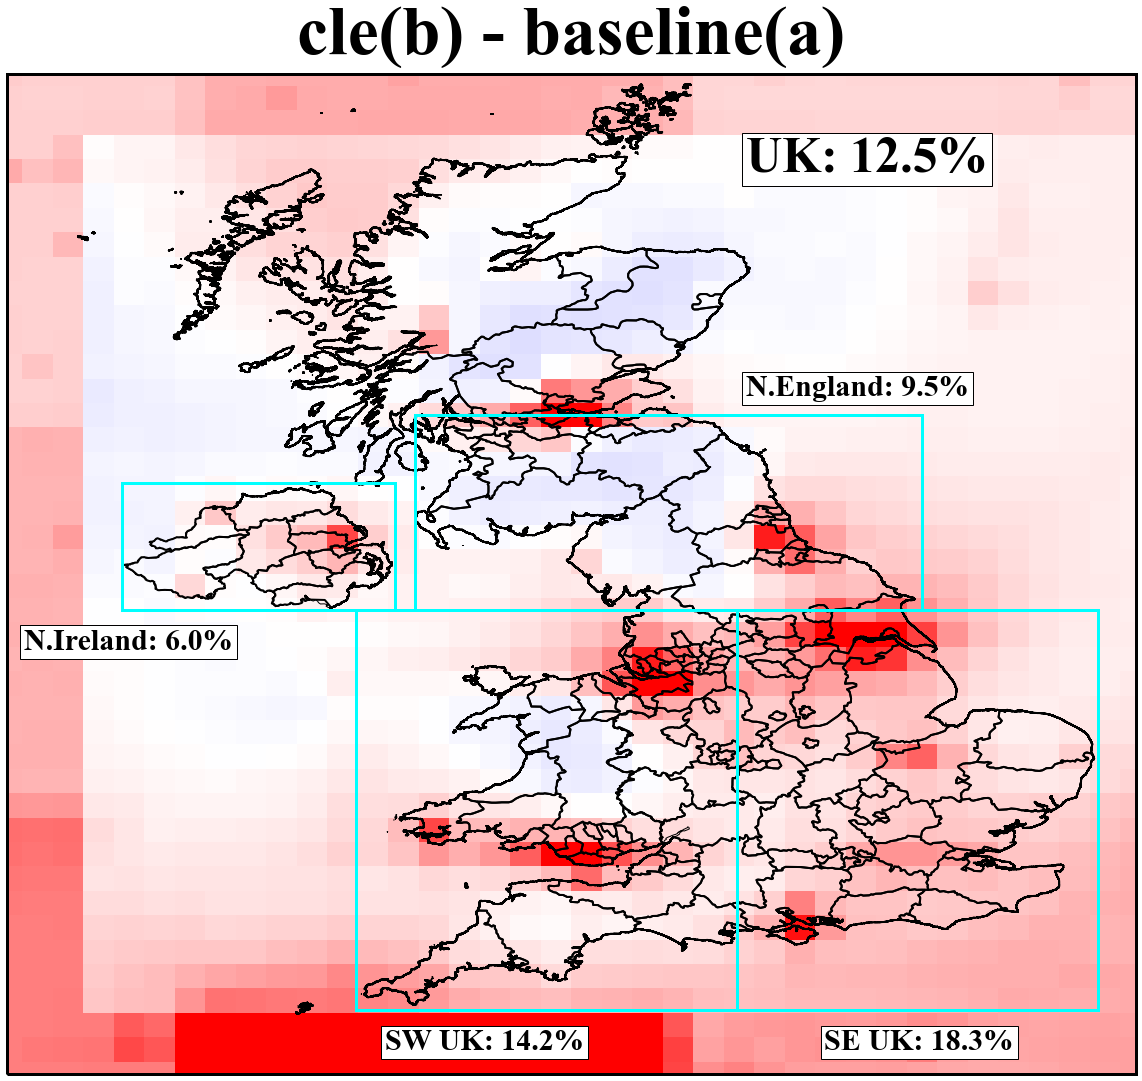

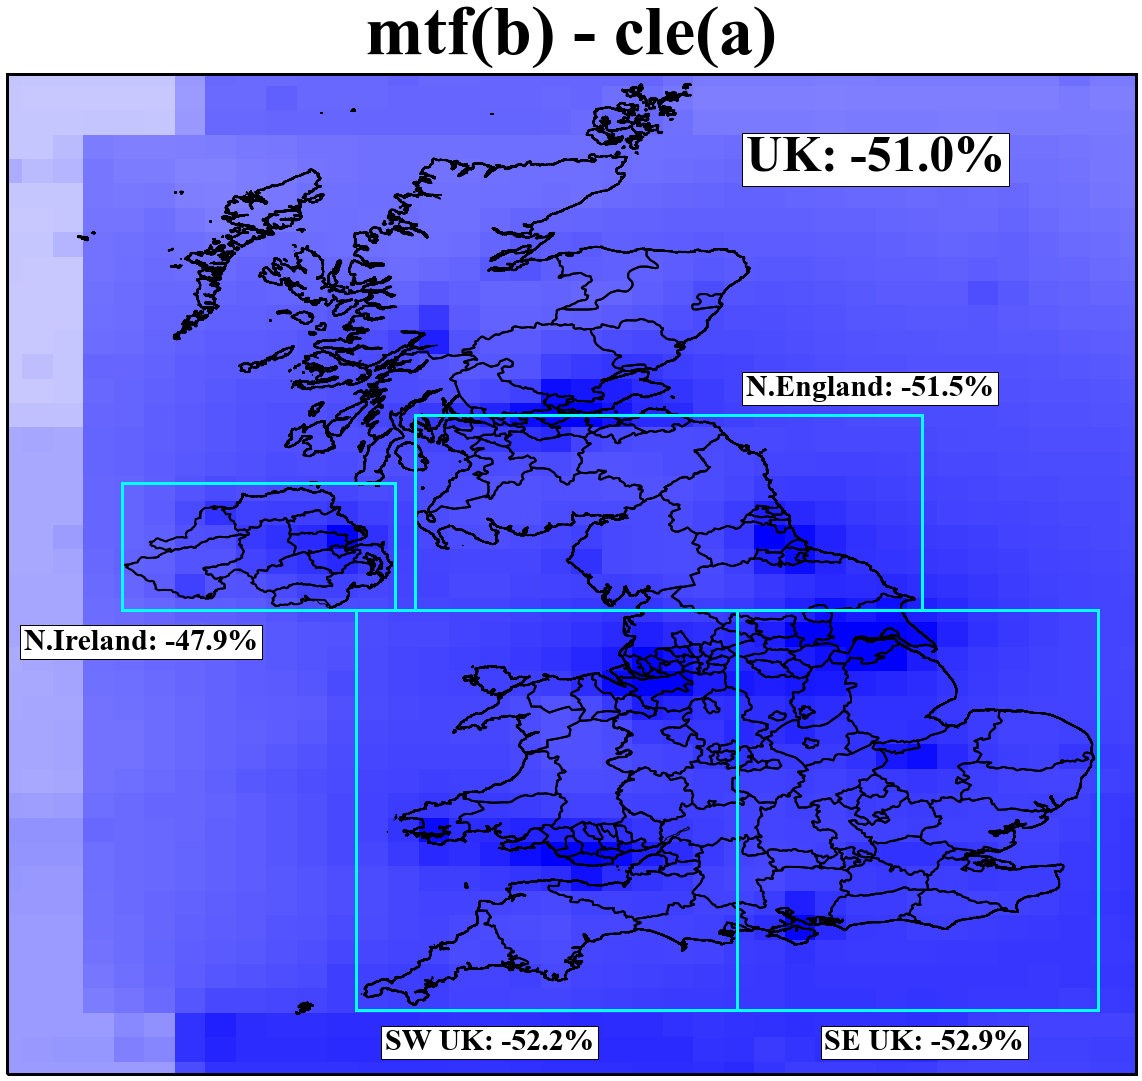

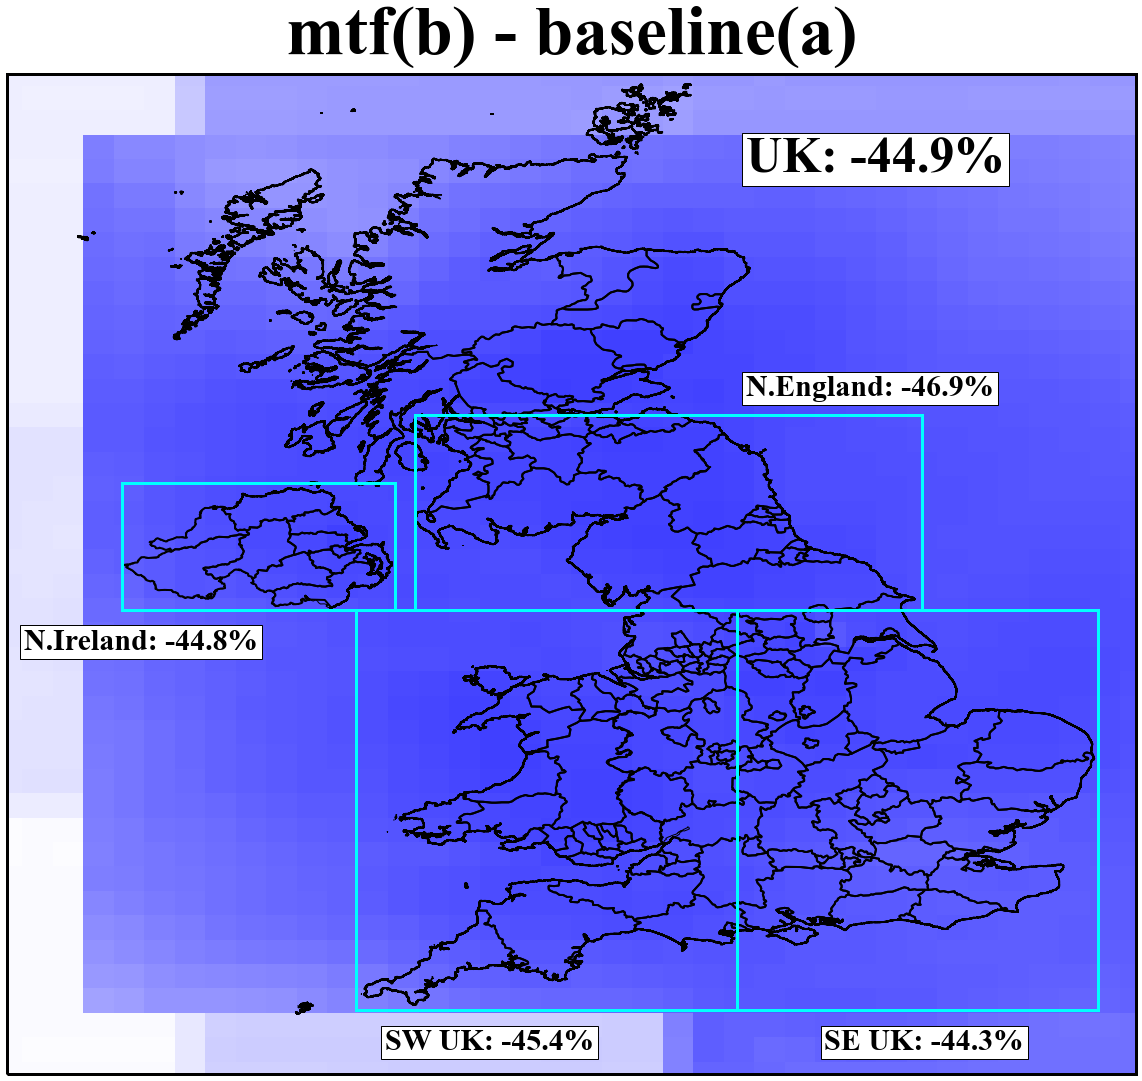

In [246]:
for situation in situations:
    fig = plt.figure(figsize=[30,20]) 
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_geometries(UK_boundary.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none',zorder=1)
    ax.add_geometries(UK_city.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none',linewidth=2,zorder=1)
    locals()[situation].plot(ax=ax, cmap=plt.cm.get_cmap('bwr'),vmax=65,zorder=0)
    ax.set(xlim=(-9.375,2.188),ylim=(49.25,59.5))

    # set your colorbar
    PCM=ax.get_children()[2]
    colorbar = plt.colorbar(PCM, ax=ax,orientation='horizontal',fraction=0.03, shrink=1,pad=0.05,extend = 'min')
    colorbar.set_ticks([-60,-40,-20,0,+20,+40,+60])
    colorbar.set_ticklabels(['{:.0f}%'.format(x) for x in [-60,-40,-20,0,+20,+40,+60]])
    colorbar.ax.tick_params(labelsize=20) 
    colorbar.ax.xaxis.label.set_size(30)

    # set the border width globally
    plt.rcParams['axes.linewidth'] = 3 

    start_lon =1.8
    end_lon=1.8
    start_lat=49.9
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-8.2
    end_lon=1.8
    start_lat=54
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-5.8
    end_lon=1.8
    start_lat=49.9
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-5.8
    end_lon=-5.8
    start_lat=54
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-1.9
    end_lon=-1.9
    start_lat=54
    end_lat=49.9
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-8.2
    end_lon=-8.2
    start_lat=54
    end_lat=55.3
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-8.2
    end_lon=-5.4
    start_lat=55.3
    end_lat=55.3
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-5.4
    end_lon=-5.4
    start_lat=55.3
    end_lat=54
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =-5.2
    end_lon=-5.2
    start_lat=54
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon =0
    end_lon=0
    start_lat=54
    end_lat=56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    start_lon = 0
    end_lon = -5.2
    start_lat = 56
    end_lat = 56
    plt.plot([start_lon,end_lon], [start_lat,end_lat],color='Cyan', linestyle='-',linewidth=3)
    
    if situation == "PM25_change_1":
        # sum all grids first before calculate the mean PM2.5 change in each area
        locals()["land_1_" + situation] = locals()["cle_PM25"]*GC_land["uk-mask"]
        locals()["land_2_" + situation] = locals()["baseline_PM25"]*GC_land["uk-mask"]
        locals()["land_" + situation] = (locals()["land_1_" + situation].sum() - locals()["land_2_" + situation].sum()) / locals()["land_2_" + situation].sum() * 100
        locals()["ire_1_" + situation] = locals()["cle_PM25"]*GC_ire["uk-mask"]
        locals()["ire_2_" + situation] = locals()["baseline_PM25"]*GC_ire["uk-mask"]
        locals()["ire_" + situation] = (locals()["ire_1_" + situation].sum() - locals()["ire_2_" + situation].sum()) / locals()["ire_2_" + situation].sum() * 100
        locals()["n_1_" + situation] = locals()["cle_PM25"]*GC_n["uk-mask"]
        locals()["n_2_" + situation] = locals()["baseline_PM25"]*GC_n["uk-mask"]
        locals()["n_" + situation] = (locals()["n_1_" + situation].sum() - locals()["n_2_" + situation].sum()) / locals()["n_2_" + situation].sum() * 100
        locals()["sw_1_" + situation] = locals()["cle_PM25"]*GC_sw["uk-mask"]
        locals()["sw_2_" + situation] = locals()["baseline_PM25"]*GC_sw["uk-mask"]
        locals()["sw_" + situation] = (locals()["sw_1_" + situation].sum() - locals()["sw_2_" + situation].sum()) / locals()["sw_2_" + situation].sum() * 100
        locals()["se_1_" + situation] = locals()["cle_PM25"]*GC_se["uk-mask"]
        locals()["se_2_" + situation] = locals()["baseline_PM25"]*GC_se["uk-mask"]
        locals()["se_" + situation] = (locals()["se_1_" + situation].sum() - locals()["se_2_" + situation].sum()) / locals()["se_2_" + situation].sum() * 100
        # insert title 
        ax.set_title('cle(b) - baseline(a)',fontsize=70,weight='bold', pad=20)
        
    if situation == "PM25_change_2":
        # sum all grids first before calculate the mean PM2.5 change in each area
        locals()["land_1_" + situation] = locals()["mtf_PM25"]*GC_land["uk-mask"]
        locals()["land_2_" + situation] = locals()["cle_PM25"]*GC_land["uk-mask"]
        locals()["land_" + situation] = (locals()["land_1_" + situation].sum() - locals()["land_2_" + situation].sum()) / locals()["land_2_" + situation].sum() * 100
        locals()["ire_1_" + situation] = locals()["mtf_PM25"]*GC_ire["uk-mask"]
        locals()["ire_2_" + situation] = locals()["cle_PM25"]*GC_ire["uk-mask"]
        locals()["ire_" + situation] = (locals()["ire_1_" + situation].sum() - locals()["ire_2_" + situation].sum()) / locals()["ire_2_" + situation].sum() * 100
        locals()["n_1_" + situation] = locals()["mtf_PM25"]*GC_n["uk-mask"]
        locals()["n_2_" + situation] = locals()["cle_PM25"]*GC_n["uk-mask"]
        locals()["n_" + situation] = (locals()["n_1_" + situation].sum() - locals()["n_2_" + situation].sum()) / locals()["n_2_" + situation].sum() * 100
        locals()["sw_1_" + situation] = locals()["mtf_PM25"]*GC_sw["uk-mask"]
        locals()["sw_2_" + situation] = locals()["cle_PM25"]*GC_sw["uk-mask"]
        locals()["sw_" + situation] = (locals()["sw_1_" + situation].sum() - locals()["sw_2_" + situation].sum()) / locals()["sw_2_" + situation].sum() * 100
        locals()["se_1_" + situation] = locals()["mtf_PM25"]*GC_se["uk-mask"]
        locals()["se_2_" + situation] = locals()["cle_PM25"]*GC_se["uk-mask"]
        locals()["se_" + situation] = (locals()["se_1_" + situation].sum() - locals()["se_2_" + situation].sum()) / locals()["se_2_" + situation].sum() * 100
        # insert title 
        ax.set_title('mtf(b) - cle(a)',fontsize=70,weight='bold', pad=20)
        
    if situation == "PM25_change_3":
        # sum all grids first before calculate the mean PM2.5 change in each area
        locals()["land_1_" + situation] = locals()["mtf_PM25"]*GC_land["uk-mask"]
        locals()["land_2_" + situation] = locals()["baseline_PM25"]*GC_land["uk-mask"]
        locals()["land_" + situation] = (locals()["land_1_" + situation].sum() - locals()["land_2_" + situation].sum()) / locals()["land_2_" + situation].sum() * 100
        locals()["ire_1_" + situation] = locals()["mtf_PM25"]*GC_ire["uk-mask"]
        locals()["ire_2_" + situation] = locals()["baseline_PM25"]*GC_ire["uk-mask"]
        locals()["ire_" + situation] = (locals()["ire_1_" + situation].sum() - locals()["ire_2_" + situation].sum()) / locals()["ire_2_" + situation].sum() * 100
        locals()["n_1_" + situation] = locals()["mtf_PM25"]*GC_n["uk-mask"]
        locals()["n_2_" + situation] = locals()["baseline_PM25"]*GC_n["uk-mask"]
        locals()["n_" + situation] = (locals()["n_1_" + situation].sum() - locals()["n_2_" + situation].sum()) / locals()["n_2_" + situation].sum() * 100
        locals()["sw_1_" + situation] = locals()["mtf_PM25"]*GC_sw["uk-mask"]
        locals()["sw_2_" + situation] = locals()["baseline_PM25"]*GC_sw["uk-mask"]
        locals()["sw_" + situation] = (locals()["sw_1_" + situation].sum() - locals()["sw_2_" + situation].sum()) / locals()["sw_2_" + situation].sum() * 100
        locals()["se_1_" + situation] = locals()["mtf_PM25"]*GC_se["uk-mask"]
        locals()["se_2_" + situation] = locals()["baseline_PM25"]*GC_se["uk-mask"]
        locals()["se_" + situation] = (locals()["se_1_" + situation].sum() - locals()["se_2_" + situation].sum()) / locals()["se_2_" + situation].sum() * 100
        # insert title 
        ax.set_title('mtf(b) - baseline(a)',fontsize=70,weight='bold', pad=20)
        
    locals()["land_" + situation] = locals()["land_" + situation].mean().values
    locals()["ire_" + situation] = locals()["ire_" + situation].mean().values
    locals()["n_" + situation] = locals()["n_" + situation].mean().values
    locals()["sw_" + situation] = locals()["sw_" + situation].mean().values
    locals()["se_" + situation] = locals()["se_" + situation].mean().values
    locals()["land_" + situation] = ('%.1f' %locals()["land_" + situation])
    locals()["ire_" + situation] = ('%.1f' %locals()["ire_" + situation])
    locals()["n_" + situation] = ('%.1f' %locals()["n_" + situation])
    locals()["sw_" + situation] = ('%.1f' %locals()["sw_" + situation])
    locals()["se_" + situation] = ('%.1f' %locals()["se_" + situation])
        
    # insert text   
    ax.text(-1.8,58.5,f'UK: {locals()["land_" + situation]}%',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-9.2,53.6,f'N.Ireland: {locals()["ire_" + situation]}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1.8,56.2,f'N.England: {locals()["n_" + situation]}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-1,49.5,f'SE UK: {locals()["se_" + situation]}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
    ax.text(-5.5,49.5,f'SW UK: {locals()["sw_" + situation]}%',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
        
    # remove the unwanted colorbar that comes by default
    plt.delaxes(fig.axes[1])
    # turn on this to save out without the legend
    plt.delaxes(fig.axes[-1])
    # turn on this to generate the legend only
    # plt.delaxes(fig.axes[0])
        
    # save the figure in png.
    fig.savefig(f'D:/Jupyter code/PM output/{situation}.png', dpi=100, bbox_inches='tight')
    

In [247]:
# find the index of London in UK_city shapefile
London = UK_city[UK_city['NAME_2']=="Greater London"]
print(London)

Lon_boundary = UK_city.geometry[35]

   GID_0          NAME_0    GID_1   NAME_1 NL_NAME_1       GID_2  \
35   GBR  United Kingdom  GBR.1_1  England      None  GBR.1.36_1   

            NAME_2 VARNAME_2 NL_NAME_2  TYPE_2 ENGTYPE_2  CC_2 HASC_2  \
35  Greater London      None      None  Region    Region  None  GB.GL   

                                             geometry  
35  POLYGON ((0.16627 51.39856, 0.16917 51.38861, ...  


In [248]:
# function: convert xarray data arrays to a single pandas dataframe 
def xr_to_df(data):
    data = data.to_dataframe()
    data.reset_index(inplace=True)
    return data

In [249]:
# function: for each GEOS-Chem grid, reate its polygon based on centre coordinates and model resolution
def create_poly(lon,lat):
    p1 = geometry.Point(lon-0.3125/2,lat-0.25/2)
    p2 = geometry.Point(lon+0.3125/2,lat-0.25/2)
    p3 = geometry.Point(lon+0.3125/2,lat+0.25/2)
    p4 = geometry.Point(lon-0.3125/2,lat+0.25/2)
    pointList = [p1, p2, p3, p4, p1]
    poly = geometry.Polygon([[p.x, p.y] for p in pointList])
    poly = gpd.GeoSeries(unary_union(poly))
    return poly

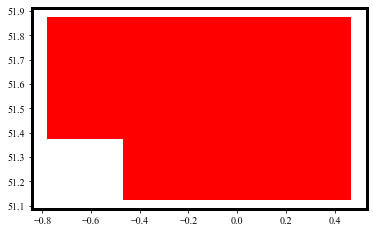

In [250]:
# calculate annual total mean PM2.5 over London and find the position of London over map    
PM25_London_annual_mean = []
for chosen_scenario in scenarios:
    pandas.set_option('mode.chained_assignment',None) # Display of warnings is completely disabled
    # rename the xarray dataset 
    locals()[chosen_scenario + "_PM25"] = locals()[chosen_scenario + "_PM25"].rename(chosen_scenario + "_PM25")

    # convert xarray to pandas dataframe 
    locals()[chosen_scenario + "_PM25" + "_df"] = xr_to_df(locals()[chosen_scenario + "_PM25"])

    # get a copy of full data over PM25_df
    locals()[chosen_scenario + "_PM25" + "_df_test"] = locals()[chosen_scenario + "_PM25" + "_df"].copy()
    
    # for each grid, test if its polygon overlaps with the London boundary
    locals()[chosen_scenario + "_PM25" + "_df_test"]['poly'] = np.nan

    for i in range(locals()[chosen_scenario + "_PM25" + "_df_test"].shape[0]):
        locals()[chosen_scenario + "_PM25" + "_df_test"]['poly'][[i]] = create_poly(locals()[chosen_scenario + "_PM25" + "_df_test"]['lon'][[i]],locals()[chosen_scenario + "_PM25" + "_df_test"]['lat'][[i]])
        
        locals()[chosen_scenario + "_PM25" + "_df_test"]['poly_group'] = np.nan
        
    for i in range(locals()[chosen_scenario + "_PM25" + "_df_test"].shape[0]):
        locals()[chosen_scenario + "_PM25" + "_df_test"]['poly_group'][[i]] = gpd.GeoSeries(locals()[chosen_scenario + "_PM25" + "_df_test"]['poly'][[i]]).intersects(Lon_boundary)
    
    # only keep those over London
    locals()[chosen_scenario + "_PM25" + "_df_test"] = locals()[chosen_scenario + "_PM25" + "_df_test"][locals()[chosen_scenario + "_PM25" + "_df_test"]['poly_group'] == True]
    locals()[chosen_scenario + "_PM25" + "_df_test"] = locals()[chosen_scenario + "_PM25" + "_df_test"].reset_index(drop=True)
        
    # calculate mean PM2.5 over these grids
    locals()[chosen_scenario + "_PM25" + "_df_mean"] = locals()[chosen_scenario + "_PM25" + "_df_test"][chosen_scenario + "_PM25"].mean()
    
    PM25_London_annual_mean.append(locals()[chosen_scenario + "_PM25" + "_df_mean"])
    
# combine the 9 grids into one shape to form London shape
Lon_grids = gpd.GeoSeries(unary_union(locals()[chosen_scenario + "_PM25" + "_df_test"]['poly']))
Lon_grids.plot(color = 'red')
plt.show()


In [251]:
# show annual mean PM2.5 in three data scenarios
print(PM25_London_annual_mean)

[8.747359275817871, 10.376069068908691, 5.19058084487915]


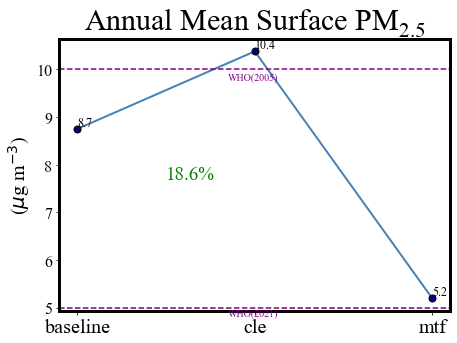

In [252]:
# plot line chart of annual mean PM2.5 over London
# calculate relative changes 
PM_change_a = (PM25_London_annual_mean[1] - PM25_London_annual_mean[0]) / PM25_London_annual_mean[0] *100
# PM_change_b = (PM25_London_annual_mean[2] - PM25_London_annual_mean[1]) / PM25_London_annual_mean[1] *100
fig = plt.figure(figsize=[7,5])
plt.plot(scenarios, PM25_London_annual_mean, linestyle='-',linewidth=2,color='steelblue',marker='o',
         markersize = 7, markeredgecolor='black',markerfacecolor='navy')
plt.axhline(y=5, ls='--', c='purple')
plt.axhline(y=10, ls='--', c='purple')
plt.text(0.85,4.82,"WHO(2021)",c='purple')
plt.text(0.85,9.78,"WHO(2005)",c='purple')
plt.text(0.5, 7.7, f"{'%.1f' %PM_change_a}%",c='green', fontsize=19)
for a, b in zip(scenarios, PM25_London_annual_mean):
    plt.text(a, b, '%.1f' %b, ha='left', va='bottom', fontsize=12)
plt.title('Annual Mean Surface $\mathregular{PM_{2.5}}$',fontsize=30)
plt.rc('font', size = 16) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=16,font='Times New Roman')
plt.ylabel('($\mu$g m$^{-3}$)',fontsize=20)
plt.savefig('D:/Jupyter code/PM output/annual mean PM2.5 over London.jpg',dpi = 100)

In [119]:
# calculate annual mean PM2.5 over four heavily polluted areas
PM25_B = []
PM25_C = []
PM25_A = []
PM25_D = []
for chosen_scenario in scenarios:
    locals()["PM25_B_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(53.5,53.9),lon=slice(-1.3125,-0.2)) ### B
    locals()["PM25_C_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(53.2,53.3),lon=slice(-2.875,-2.5)) ### C
    locals()["PM25_A_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(56,56),lon=slice(-3.75,-3.75)) ### A
    locals()["PM25_D_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(51.5,51.5),lon=slice(-3.4375,-3.4375)) ### D
    PM25_B.append(locals()["PM25_B_" + chosen_scenario].mean().values)
    PM25_C.append(locals()["PM25_C_" + chosen_scenario].mean().values)
    PM25_A.append(locals()["PM25_A_" + chosen_scenario].mean().values)
    PM25_D.append(locals()["PM25_D_" + chosen_scenario].mean().values)
    

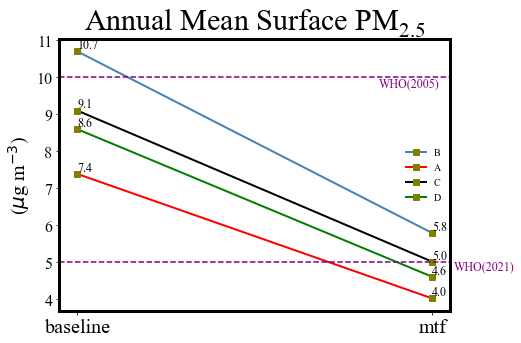

In [224]:
# plot line chart of annual mean PM2.5 over four heavily polluted areas
fig = plt.figure(figsize=[7,5])
plt.plot(scenarios, PM25_B, linestyle='-',linewidth=2,color='steelblue',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.plot(scenarios, PM25_A, linestyle='-',linewidth=2,color='red',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.plot(scenarios, PM25_C, linestyle='-',linewidth=2,color='black',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.plot(scenarios, PM25_D, linestyle='-',linewidth=2,color='green',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.axhline(y=5, ls='--', c='purple')
plt.axhline(y=10, ls='--', c='purple')
plt.text(1.06,4.8,"WHO(2021)",c='purple')
plt.text(0.85,9.75,"WHO(2005)",c='purple')
for a, b in zip(scenarios, PM25_B):
    plt.text(a, b, '%.1f' %b, ha='left', va='bottom', fontsize=12)
for a, b in zip(scenarios, PM25_C):
    plt.text(a, b, '%.1f' %b, ha='left', va='bottom', fontsize=12)
for a, b in zip(scenarios, PM25_A):
    plt.text(a, b, '%.1f' %b, ha='left', va='bottom', fontsize=12)
for a, b in zip(scenarios, PM25_D):
    plt.text(a, b, '%.1f' %b, ha='left', va='bottom', fontsize=12)
plt.title('Annual Mean Surface $\mathregular{PM_{2.5}}$',fontsize=30)
plt.rc('font', size = 12) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=16,font='Times New Roman')
plt.ylabel('($\mu$g m$^{-3}$)',fontsize=20)
plt.legend(["B","A","C","D"],loc='best',fontsize="small",frameon=False)
plt.savefig('D:/Jupyter code/PM output/annual mean PM2.5 over four polluted areas.jpg',dpi = 100)


In [254]:
# calculate monthly PM2.5 over London and four heavily polluted areas
for chosen_scenario in scenarios:
    locals()[chosen_scenario + "_PM25_monthly_A"] = []
    locals()[chosen_scenario + "_PM25_monthly_B"] = []
    locals()[chosen_scenario + "_PM25_monthly_C"] = []
    locals()[chosen_scenario + "_PM25_monthly_D"] = []
    locals()[chosen_scenario + "_PM25_monthly_London"] = []

In [255]:
# show monthly mean PM2.5 in three data scenarios
Month = ["January", "February","March","April","May","June","July","August","September","October","November","December"]
for chosen_scenario in scenarios:
    for month in range(1,13):
        path="D:/Jupyter code/GEOS-CHEM/" + chosen_scenario +  "_uk_nest/GEOSChem.SpeciesConc*.nc4"
        # calculate the monthly mean PM2.5 
        locals()[chosen_scenario]  = sorted(glob.glob(path))
        locals()[chosen_scenario + "_species"]  = [xr.open_dataset(file) for file in vars()[chosen_scenario]]
        locals()[chosen_scenario + "_SO4"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_SO4'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_NIT"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_NIT'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_NH4"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_NH4'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_BCPO"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_BCPO'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_BCPI"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_BCPI'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_OCPO"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_OCPO'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_OCPI"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_OCPI'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_SALA"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_SALA'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_DST1"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_DST1'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_DST2"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_DST2'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_SOAS"] = locals()[chosen_scenario + "_species"][month-1]['SpeciesConc_SOAS'].isel(time=0,lev=0) 
        locals()[chosen_scenario + "_SO4"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_SO4"]
        locals()[chosen_scenario + "_NIT"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_NIT"]
        locals()[chosen_scenario + "_NH4"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_NH4"]
        locals()[chosen_scenario + "_BCPO"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_BCPO"]
        locals()[chosen_scenario + "_BCPI"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_BCPI"]
        locals()[chosen_scenario + "_OCPO"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_OCPO"]
        locals()[chosen_scenario + "_OCPI"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_OCPI"]
        locals()[chosen_scenario + "_SALA"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_SALA"]
        locals()[chosen_scenario + "_DST1"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_DST1"]
        locals()[chosen_scenario + "_DST2"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_DST2"]
        locals()[chosen_scenario + "_SOAS"] = 1 * 1.0e9 * 96.06 * ppm_mgm3 * locals()[chosen_scenario + "_SOAS"]
        locals()[chosen_scenario + "_PM25"] = (vars()[chosen_scenario + "_NH4"] + vars()[chosen_scenario + "_NIT"] + vars()[chosen_scenario + "_SO4"]) * 1.35
        + vars()[chosen_scenario + "_BCPI"] + vars()[chosen_scenario + "_BCPO"]  
        +(vars()[chosen_scenario + "_OCPO"] + (vars()[chosen_scenario + "_OCPI"] * 1.07 ) ) * 2.1  
        + vars()[chosen_scenario + "_DST1"] + vars()[chosen_scenario + "_DST2"] * 0.30  
        + vars()[chosen_scenario + "_SALA"] * 1.86  + vars()[chosen_scenario + "_SOAS"] * 1.07
        
        # calculate monthly PM2.5 over London and four heavily polluted areas
        pandas.set_option('mode.chained_assignment',None)
        # rename the xarray dataset 
        locals()[chosen_scenario + "_PM25"] = locals()[chosen_scenario + "_PM25"].rename(chosen_scenario + "_PM25")
        # convert xarray to pandas dataframe 
        locals()[chosen_scenario + "_PM25" + "_df"] = xr_to_df(locals()[chosen_scenario + "_PM25"])
        # get a copy of full data over PM25_df
        locals()[chosen_scenario + "_PM25" + "_df_test"] = locals()[chosen_scenario + "_PM25" + "_df"].copy()
        # for each grid, test if its polygon overlaps with the London boundary
        locals()[chosen_scenario + "_PM25" + "_df_test"]['poly'] = np.nan
        for i in range(locals()[chosen_scenario + "_PM25" + "_df_test"].shape[0]):
            locals()[chosen_scenario + "_PM25" + "_df_test"]['poly'][[i]] = create_poly(locals()[chosen_scenario + "_PM25" + "_df_test"]['lon'][[i]],locals()[chosen_scenario + "_PM25" + "_df_test"]['lat'][[i]])
        locals()[chosen_scenario + "_PM25" + "_df_test"]['poly_group'] = np.nan
        for i in range(locals()[chosen_scenario + "_PM25" + "_df_test"].shape[0]):
            locals()[chosen_scenario + "_PM25" + "_df_test"]['poly_group'][[i]] = gpd.GeoSeries(locals()[chosen_scenario + "_PM25" + "_df_test"]['poly'][[i]]).intersects(Lon_boundary)
        # only keep those over London
        locals()[chosen_scenario + "_PM25" + "_df_test"] = locals()[chosen_scenario + "_PM25" + "_df_test"][locals()[chosen_scenario + "_PM25" + "_df_test"]['poly_group'] == True]
        locals()[chosen_scenario + "_PM25" + "_df_test"] = locals()[chosen_scenario + "_PM25" + "_df_test"].reset_index(drop=True)
        # calculate mean PM2.5 over these grids
        locals()[chosen_scenario + "_PM25" + "_df_mean"] = locals()[chosen_scenario + "_PM25" + "_df_test"][chosen_scenario + "_PM25"].mean()
        locals()[chosen_scenario + "_PM25_monthly_London"].append(locals()[chosen_scenario + "_PM25" + "_df_mean"])
    
        locals()["PM25_B_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(53.5,53.9),lon=slice(-1.3125,-0.2)) ### B
        locals()["PM25_C_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(53.2,53.3),lon=slice(-2.875,-2.5)) ### C
        locals()["PM25_A_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(56,56),lon=slice(-3.75,-3.75)) ### A
        locals()["PM25_D_" + chosen_scenario] = locals()[chosen_scenario + "_PM25"].sel(lat=slice(51.5,51.5),lon=slice(-3.4375,-3.4375)) ### D
        locals()[chosen_scenario + "_PM25_monthly_B"].append(locals()["PM25_B_" + chosen_scenario].mean().values)
        locals()[chosen_scenario + "_PM25_monthly_C"].append(locals()["PM25_C_" + chosen_scenario].mean().values)
        locals()[chosen_scenario + "_PM25_monthly_A"].append(locals()["PM25_A_" + chosen_scenario].mean().values)
        locals()[chosen_scenario + "_PM25_monthly_D"].append(locals()["PM25_D_" + chosen_scenario].mean().values)
    
        # plot monthly figures
        fig = plt.figure(figsize=[30,20])
        ax = plt.axes(projection=ccrs.PlateCarree()) 
        box = [-9.375,2.188,49.25,59.5] 
        ax.set_extent(box)
        ax.add_geometries(UK_boundary.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none', zorder=1)
        ax.add_geometries(UK_city.geometry, crs=ccrs.PlateCarree(),edgecolor='black',facecolor='none',linewidth=2, zorder=1)
        locals()[chosen_scenario + "_PM25"].plot(ax=ax,cmap=WhGrYlRd,vmin=4,vmax=22,zorder=0)
    
        # add area division lines
        start_lon =1.8
        end_lon=1.8
        start_lat=49.9
        end_lat=54
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-8.2
        end_lon=1.8
        start_lat=54
        end_lat=54
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-5.8
        end_lon=1.8
        start_lat=49.9
        end_lat=49.9
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-5.8
        end_lon=-5.8
        start_lat=54
        end_lat=49.9
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-1.9
        end_lon=-1.9
        start_lat=54
        end_lat=49.9
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-8.2
        end_lon=-8.2
        start_lat=54
        end_lat=55.3
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-8.2
        end_lon=-5.4
        start_lat=55.3
        end_lat=55.3
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-5.4
        end_lon=-5.4
        start_lat=55.3
        end_lat=54
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =-5.2
        end_lon=-5.2
        start_lat=54
        end_lat=56
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =0
        end_lon=0
        start_lat=54
        end_lat=56
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        start_lon =0
        end_lon=-5.2
        start_lat=56
        end_lat=56
        plt.plot([start_lon,end_lon], [start_lat,end_lat],color='DarkOrchid', linestyle='-')
        
        # calculate mean PM2.5 in each area
        locals()[chosen_scenario + "_PM25_land"] = locals()[chosen_scenario + "_PM25"]*GC_land["uk-mask"]
        locals()[chosen_scenario + "_PM25_ire"] = locals()[chosen_scenario + "_PM25"]*GC_ire["uk-mask"]
        locals()[chosen_scenario + "_PM25_n"] = locals()[chosen_scenario + "_PM25"]*GC_n["uk-mask"]
        locals()[chosen_scenario + "_PM25_sw"] = locals()[chosen_scenario + "_PM25"]*GC_sw["uk-mask"]
        locals()[chosen_scenario + "_PM25_se"] = locals()[chosen_scenario + "_PM25"]*GC_se["uk-mask"]
        locals()[chosen_scenario + "_PM25_land"] = locals()[chosen_scenario + "_PM25_land"].mean().values
        locals()[chosen_scenario + "_PM25_ire"] = locals()[chosen_scenario + "_PM25_ire"].mean().values
        locals()[chosen_scenario + "_PM25_n"] = locals()[chosen_scenario + "_PM25_n"].mean().values
        locals()[chosen_scenario + "_PM25_sw"] = locals()[chosen_scenario + "_PM25_sw"].mean().values
        locals()[chosen_scenario + "_PM25_se"] = locals()[chosen_scenario + "_PM25_se"].mean().values
        locals()[chosen_scenario + "_PM25_land"] = ('%.1f' %locals()[chosen_scenario + "_PM25_land"])
        locals()[chosen_scenario + "_PM25_ire"] = ('%.1f' %locals()[chosen_scenario + "_PM25_ire"])
        locals()[chosen_scenario + "_PM25_n"] = ('%.1f' %locals()[chosen_scenario + "_PM25_n"])
        locals()[chosen_scenario + "_PM25_sw"] = ('%.1f' %locals()[chosen_scenario + "_PM25_sw"])
        locals()[chosen_scenario + "_PM25_se"] = ('%.1f' %locals()[chosen_scenario + "_PM25_se"])
        ax.set_title(" ")
        ax.text(-1,58.4,f'UK: {locals()[chosen_scenario + "_PM25_land"]}',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
        ax.text(-9.1,53.6,f'N.Ireland: {locals()[chosen_scenario + "_PM25_ire"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
        ax.text(-1.8,56.2,f'N.England: {locals()[chosen_scenario + "_PM25_n"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
        ax.text(-1,49.5,f'SE UK: {locals()[chosen_scenario + "_PM25_se"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
        ax.text(-5.5,49.5,f'SW UK: {locals()[chosen_scenario + "_PM25_sw"]}',fontsize=30,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
        ax.text(-1,59,f'{Month[month-1]}',fontsize=50,weight='bold',bbox=dict(facecolor='white', edgecolor='black'))
            
        # turn on this to save out without the legend
        plt.delaxes(fig.axes[-1])
        # turn on this to generate the legend only
        # plt.delaxes(fig.axes[0])

        # save figures
        fig.savefig(f'D:/Jupyter code/PM output/{chosen_scenario}_seasonal_variation_{month}.png', dpi=100)
        plt.close()

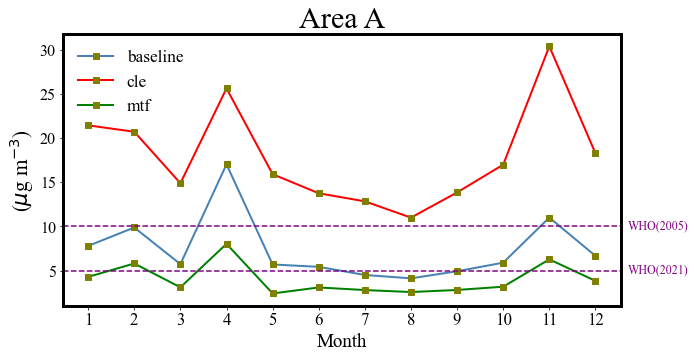

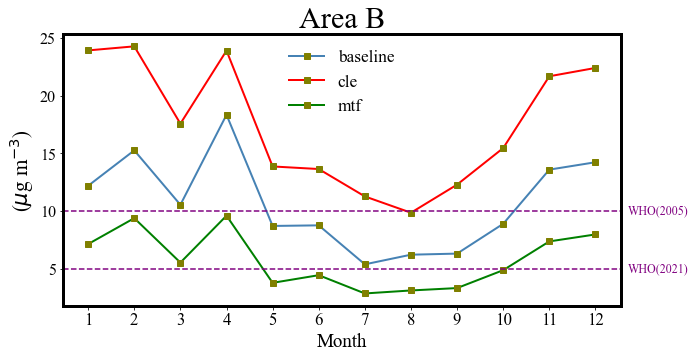

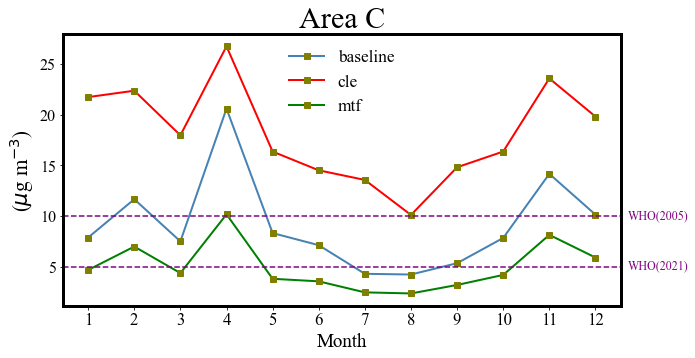

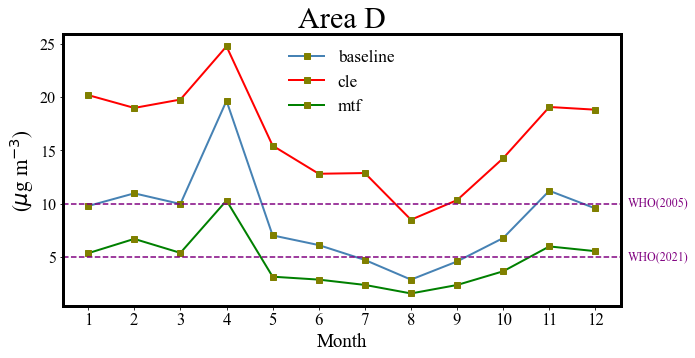

In [257]:
# plot seasonal variations over four heavily polluted areas
areas = ["A","B","C","D"]    
x=range(1,13)
for area in areas:
    fig = plt.figure(figsize=[10,5])
    plt.plot(x, locals()["baseline" + "_PM25_monthly_" + area], linestyle='-',linewidth=2,color='steelblue',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
    plt.plot(x, locals()["cle" + "_PM25_monthly_" + area], linestyle='-',linewidth=2,color='red',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
    plt.plot(x, locals()["mtf" + "_PM25_monthly_" + area], linestyle='-',linewidth=2,color='green',marker='s',
         markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
    plt.axhline(y=5, ls='--', c='purple')
    plt.axhline(y=10, ls='--', c='purple')
    plt.text(12.7,4.75,"WHO(2021)",c='purple')
    plt.text(12.7,9.75,"WHO(2005)",c='purple')
    plt.title(f'Area {area}',fontsize=30)
    plt.rc('font', size = 12) 
    plt.xticks(x,fontsize=16.9,font='Times New Roman') 
    plt.yticks(fontsize=16,font='Times New Roman')
    plt.ylabel('($\mu$g m$^{-3}$)',fontsize = 21)
    plt.xlabel('Month',fontsize = 19)
    plt.legend(["baseline","cle","mtf"],loc='best',fontsize="x-large",frameon=False)
    plt.savefig(f'D:/Jupyter code/PM output/monthly PM2.5 over{area}.jpg',dpi = 100)


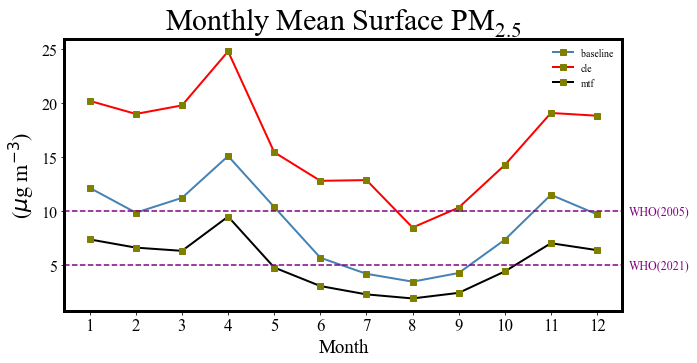

In [258]:
# plot seasonal variations over London
fig = plt.figure(figsize=[10,5])
x=range(1,13)
plt.plot(x, locals()["baseline" + "_PM25_monthly_London"], linestyle='-',linewidth=2,color='steelblue',marker='s',
        markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.plot(x, locals()["cle" + "_PM25_monthly_" + area], linestyle='-',linewidth=2,color='red',marker='s',
        markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.plot(x, locals()["mtf" + "_PM25_monthly_London"], linestyle='-',linewidth=2,color='black',marker='s',
        markersize = 6, markeredgecolor='olive',markerfacecolor='olive')
plt.axhline(y=5, ls='--', c='purple')
plt.axhline(y=10, ls='--', c='purple')
plt.text(12.7,4.75,"WHO(2021)",c='purple')
plt.text(12.7,9.75,"WHO(2005)",c='purple')
plt.title('Monthly Mean Surface $\mathregular{PM_{2.5}}$',fontsize=30)
plt.rc('font', size = 12) 
plt.xticks(x,fontsize=16.9,font='Times New Roman') 
plt.yticks(fontsize=16,font='Times New Roman')
plt.ylabel('($\mu$g m$^{-3}$)',fontsize = 22)
plt.xlabel('Month',fontsize = 19)
plt.legend(["baseline","cle","mtf"],loc='best',fontsize="small",frameon=False)
plt.savefig(f'D:/Jupyter code/PM output/monthly PM2.5 over four polluted areas.jpg',dpi = 100)